In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/vivekrambha/Documents/QMUL Slides and Notes/Music recommendation system/ab_testing.csv")

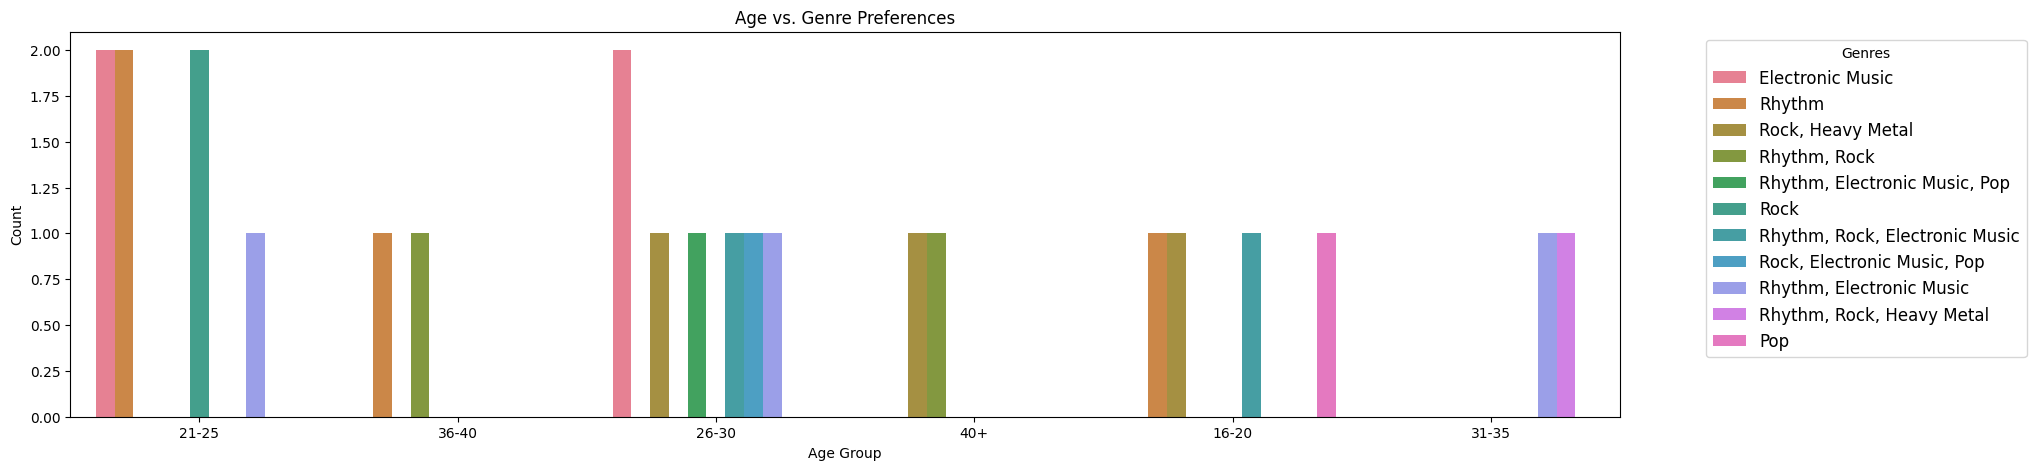

In [3]:
plt.figure(figsize=(20, 5))
sns.countplot(data=data, x='Age', hue='What kind of Genres do you like?')
plt.title('Age vs. Genre Preferences')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
# plt.legend(title='Genres')
plt.show()

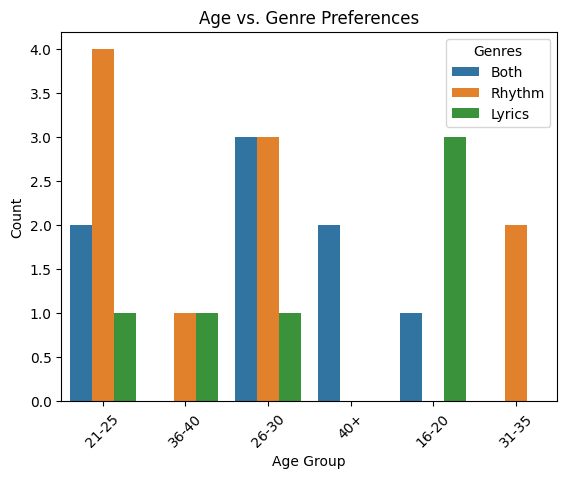

In [4]:
# plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='Age', hue='When you listen to new music, do you prefer it because of the lyrics or the rhythm?')
plt.title('Age vs. Genre Preferences')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Genres')
plt.show()

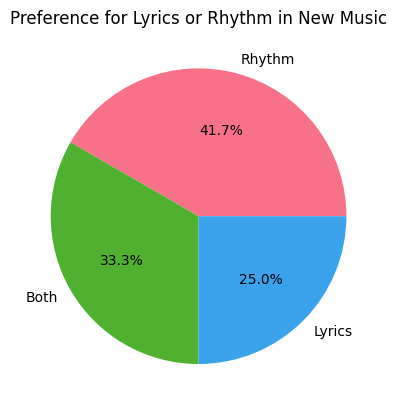

In [5]:
counts = data["When you listen to new music, do you prefer it because of the lyrics or the rhythm?"].value_counts()

# plt.figure(figsize=())
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("husl", len(counts)))
plt.title('Preference for Lyrics or Rhythm in New Music')
plt.show()


/var/folders/py/kzrghxss26z3qgjp6dp61_lc0000gn/T/ipykernel_48462/1942147563.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendation_1_counts.index, y=recommendation_1_counts.values, palette=custom_palette)


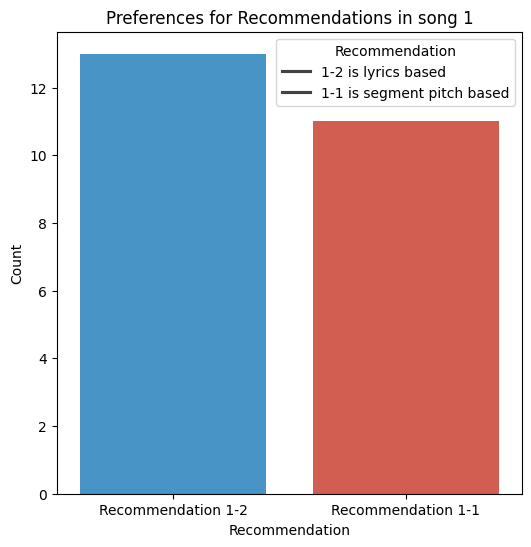

In [6]:
recommendation_1_counts = data['Which recommendation do you prefer in system 1?'].value_counts()
custom_palette = sns.color_palette(["#3498db", "#e74c3c"])
# Plot the recommendations
plt.figure(figsize=(6, 6))
sns.barplot(x=recommendation_1_counts.index, y=recommendation_1_counts.values, palette=custom_palette)
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.title('Preferences for Recommendations in song 1')
plt.legend(labels=["1-2 is lyrics based", "1-1 is segment pitch based"], title="Recommendation")
plt.show()


/var/folders/py/kzrghxss26z3qgjp6dp61_lc0000gn/T/ipykernel_48462/1561964578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendation_2_counts.index, y=recommendation_2_counts.values, palette=palette)
/var/folders/py/kzrghxss26z3qgjp6dp61_lc0000gn/T/ipykernel_48462/1561964578.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=recommendation_2_counts.index, y=recommendation_2_counts.values, palette=palette)


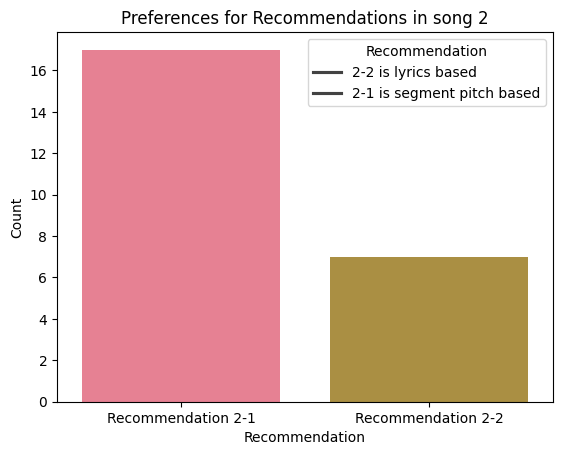

In [7]:
recommendation_2_counts = data['Which one do you prefer system 2?'].value_counts()

# Plot the recommendations
# plt.figure(figsize=(6, 6))
palette = sns.color_palette("husl")
sns.barplot(x=recommendation_2_counts.index, y=recommendation_2_counts.values, palette=palette)
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.title('Preferences for Recommendations in song 2')
plt.legend(labels=["2-2 is lyrics based", "2-1 is segment pitch based"], title="Recommendation")
plt.show()

In [8]:
data_expanded = data.assign(
    Genres=data['What kind of Genres do you like?'].str.split(', ')
).explode('Genres')

# Create a cross-tabulation
genre_rec1_crosstab = pd.crosstab(
    index=data_expanded['Genres'],
    columns=data_expanded['Which recommendation do you prefer in system 1?']
)
print(genre_rec1_crosstab)

Which recommendation do you prefer in system 1?  Recommendation 1-1  \
Genres                                                                
Electronic Music                                                  5   
Heavy Metal                                                       2   
Pop                                                               1   
Rhythm                                                            4   
Rock                                                              3   

Which recommendation do you prefer in system 1?  Recommendation 1-2  
Genres                                                               
Electronic Music                                                  6  
Heavy Metal                                                       2  
Pop                                                               2  
Rhythm                                                            9  
Rock                                                              8  


In [9]:
genre_rec2_crosstab = pd.crosstab(
    index=data_expanded['Genres'],
    columns=data_expanded['Which one do you prefer system 2?']
)
print(genre_rec2_crosstab)

Which one do you prefer system 2?  Recommendation 2-1  Recommendation 2-2
Genres                                                                   
Electronic Music                                    7                   4
Heavy Metal                                         4                   0
Pop                                                 2                   1
Rhythm                                              7                   6
Rock                                               10                   1


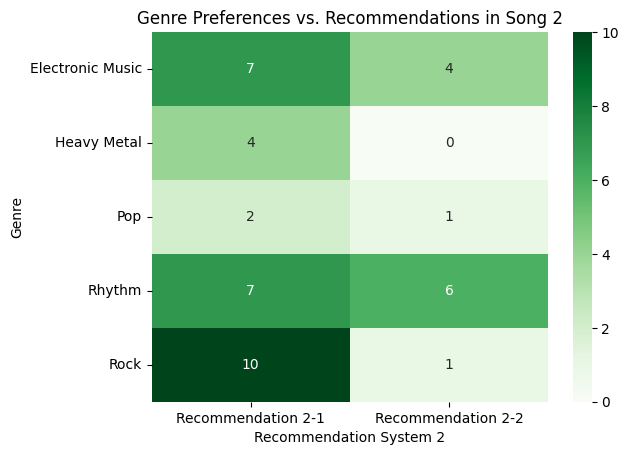

In [10]:
# plt.figure(figsize=(12, 8))
sns.heatmap(genre_rec2_crosstab, annot=True, cmap='Greens', fmt='d')
plt.title('Genre Preferences vs. Recommendations in Song 2')
plt.xlabel('Recommendation System 2')
plt.ylabel('Genre')
plt.show()


In [11]:
# Create a cross-tabulation
genre_rec2_crosstab = pd.crosstab(
    index=data_expanded['Genres'],
    columns=data_expanded['Which one do you prefer system 2?']
)
print(genre_rec2_crosstab)


Which one do you prefer system 2?  Recommendation 2-1  Recommendation 2-2
Genres                                                                   
Electronic Music                                    7                   4
Heavy Metal                                         4                   0
Pop                                                 2                   1
Rhythm                                              7                   6
Rock                                               10                   1


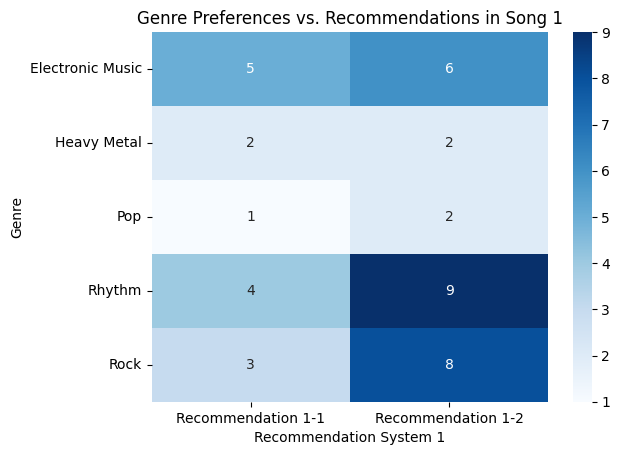

In [12]:
# plt.figure(figsize=(12, 8))
sns.heatmap(genre_rec1_crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Genre Preferences vs. Recommendations in Song 1')
plt.xlabel('Recommendation System 1')
plt.ylabel('Genre')
plt.show()

In [13]:
rec1_pref_crosstab = pd.crosstab(
    index=data['When you listen to new music, do you prefer it because of the lyrics or the rhythm?'],
    columns=data['Which recommendation do you prefer in system 1?']
)

rec2_pref_crosstab = pd.crosstab(
    index=data['When you listen to new music, do you prefer it because of the lyrics or the rhythm?'],
    columns=data['Which one do you prefer system 2?']
)

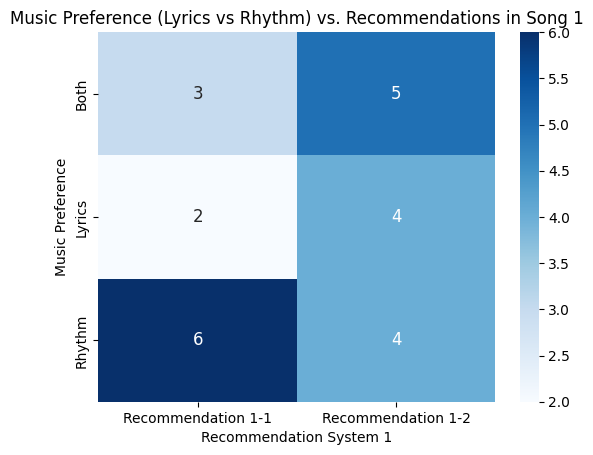

In [14]:
# plt.figure(figsize=(12, 8))
sns.heatmap(rec1_pref_crosstab, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 12})
plt.title('Music Preference (Lyrics vs Rhythm) vs. Recommendations in Song 1')
plt.xlabel('Recommendation System 1')
plt.ylabel('Music Preference')
plt.show()


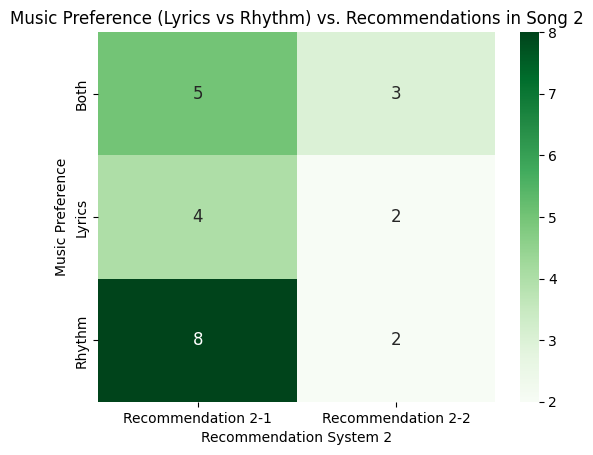

In [15]:
# plt.figure(figsize=(12, 8))
sns.heatmap(rec2_pref_crosstab, annot=True, cmap='Greens', fmt='d', annot_kws={'size': 12})
plt.title('Music Preference (Lyrics vs Rhythm) vs. Recommendations in Song 2')
plt.xlabel('Recommendation System 2')
plt.ylabel('Music Preference')
plt.show()
